# Natural Language Processing - Alexa Reviews

Data Source: https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews

In [1]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
np.random.seed(123)
%matplotlib inline

In [2]:
#Find Working Directory
os.getcwd()

'C:\\Users\\tawsi'

In [3]:
#Import the reviews data
reviews_df = pd.read_csv('amazon_alexa.tsv', sep = "\t")

In [4]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
reviews_df.shape

(3150, 5)

In [6]:
#Feedback column - 1 or 0, it's 1 if rating is 4 or 5, otherwise it's 0 for lower ratings


In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [8]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
#Take a look at the reviews
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
5       I received the echo as a gift. I needed anothe...
6       Without having a cellphone, I cannot use many ...
7       I think this is the 5th one I've purchased. I'...
8                                             looks great
9       Love it! I’ve listened to songs I haven’t hear...
10      I sent it to my 85 year old Dad, and he talks ...
11      I love it! Learning knew things with it eveyda...
12      I purchased this for my mother who is having k...
13                                     Love, Love, Love!!
14                               Just what I expected....
15                              I love it, wife hates it.
16      Really happy with this purchase.  Great speake...
17      We hav

Data Exploration

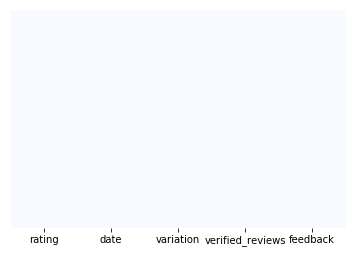

In [11]:
#Null values
sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')
plt.show()

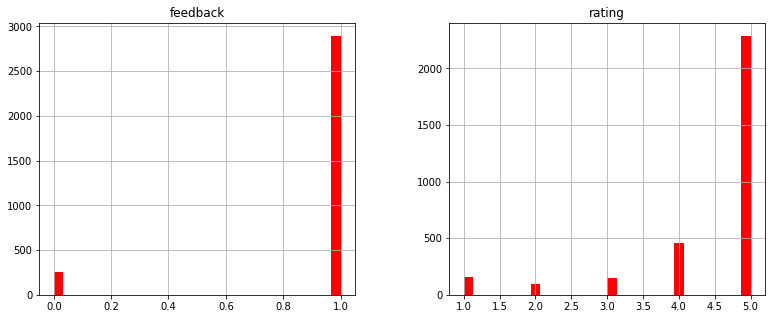

In [12]:
#Plot histograms
reviews_df.hist(bins = 30, figsize = (13, 5), color = 'r')
plt.show()

From the feedback, we can see that there are around 2800 positive reviews and around 250 bad reviews

For ratings, most of them ate 5 star reviews


In [14]:
#From the reviews column, add a new column showing the length of characters in the column
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [15]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


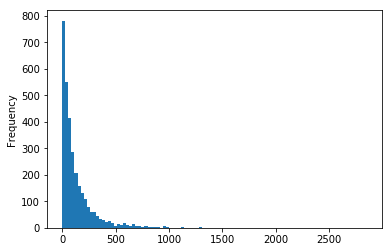

In [16]:
#Get histogram
reviews_df['length'].plot(bins = 100, kind = 'hist')
plt.show()

In [17]:
#Most of the reviews are short.

In [18]:
#Find the maximum and minimum length columns
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [19]:
#Longest Review
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [20]:
#Shortest review
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [21]:
#Mean
reviews_df[reviews_df['length'] == 132]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [22]:
#Explore Positive reviews on it's own and negative reviews on it's own by creating the dataframes

In [23]:
positive = reviews_df[reviews_df['feedback'] == 1]

In [24]:
positive.head()


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [25]:
positive.shape

(2893, 6)

In [26]:
negative = reviews_df[reviews_df['feedback'] == 0]

In [27]:
negative.head()


,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [28]:
negative.shape

(257, 6)

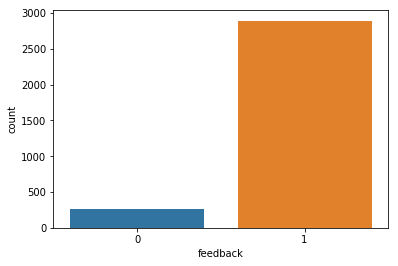

In [29]:
sns.countplot(reviews_df['feedback'], label = 'Count')
plt.show()

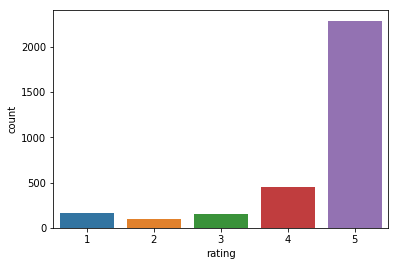

In [30]:
sns.countplot(x = 'rating', data = reviews_df)
plt.show()

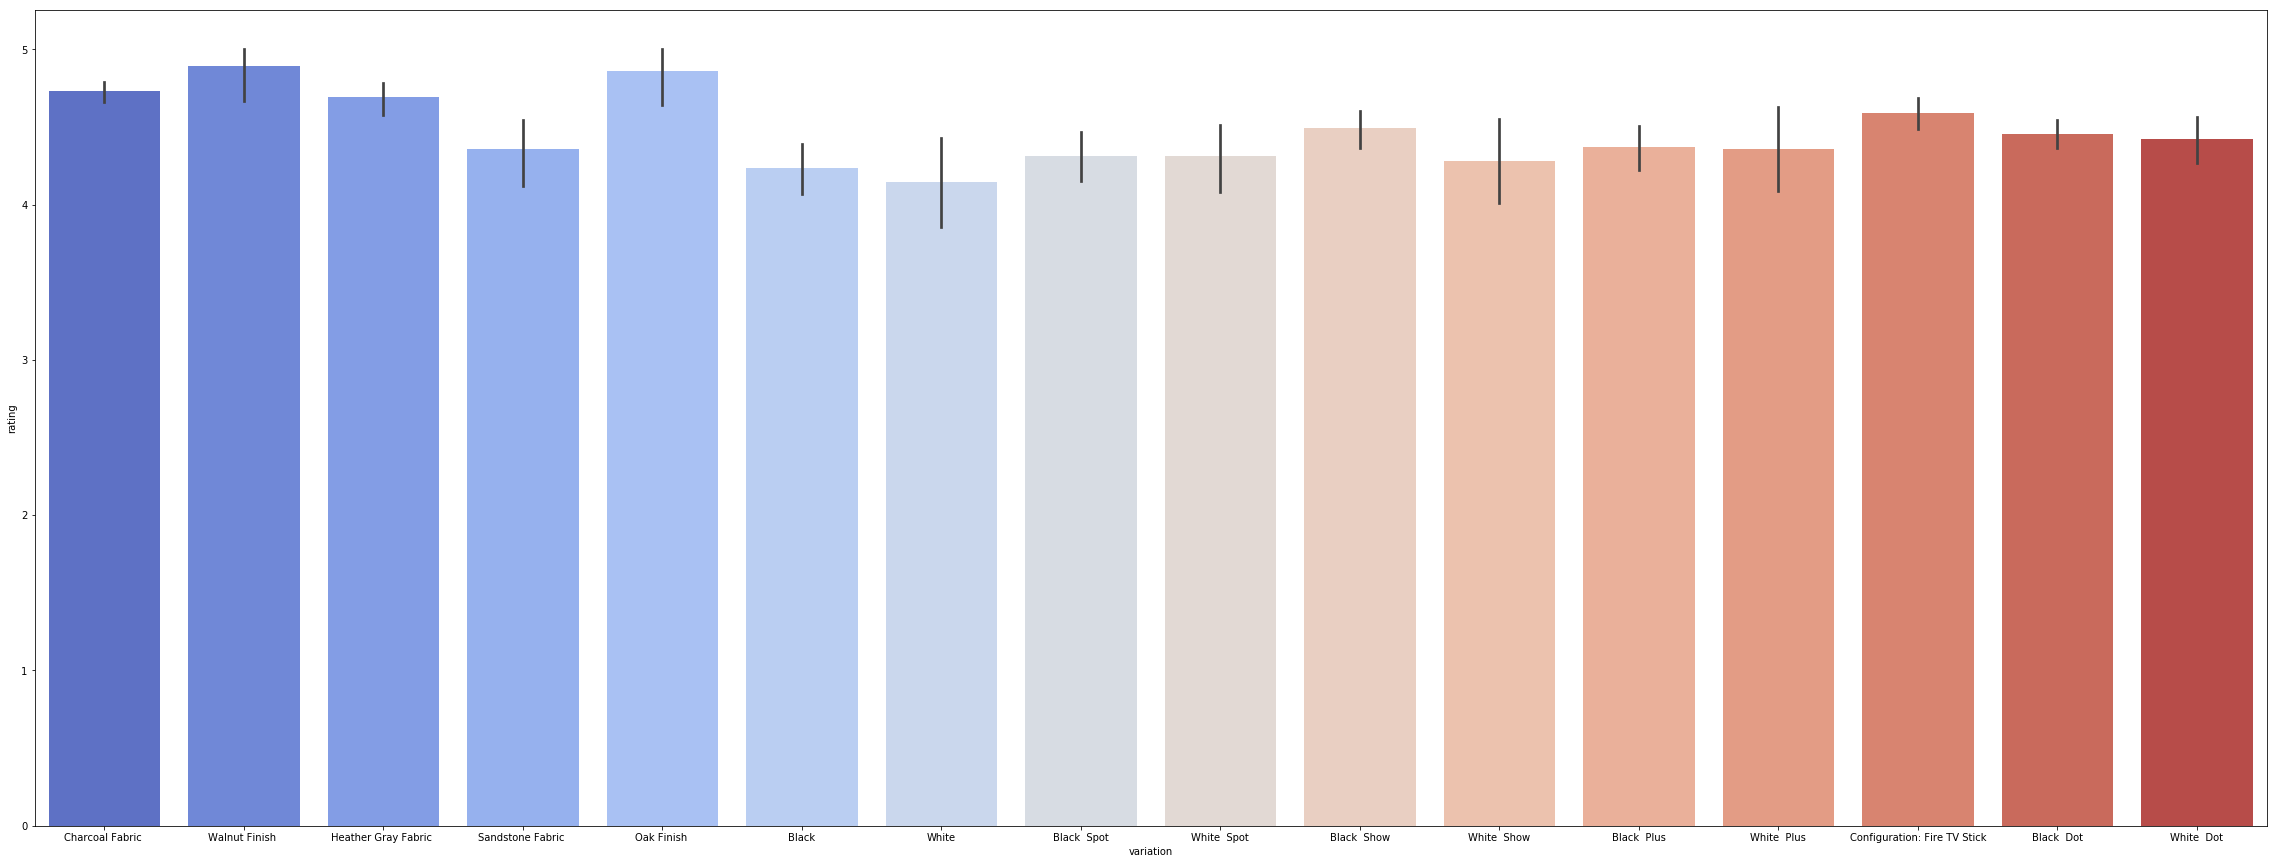

In [31]:
#Explore relationship between variations and feedback
plt.figure(figsize = (40, 15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette = 'coolwarm')
plt.show()

In [32]:
#Plot wordclouds - famous words that the users are using


In [33]:
#Combine the review columns in one massive paragraph - turning it into a big massive list
sentences = reviews_df['verified_reviews'].tolist()

In [34]:
#Connect all the sentences together as one string
sentences_as_one_String = " ".join(sentences) #Take the sentences, join them up and convert them into one big string 

In [35]:
from wordcloud import WordCloud

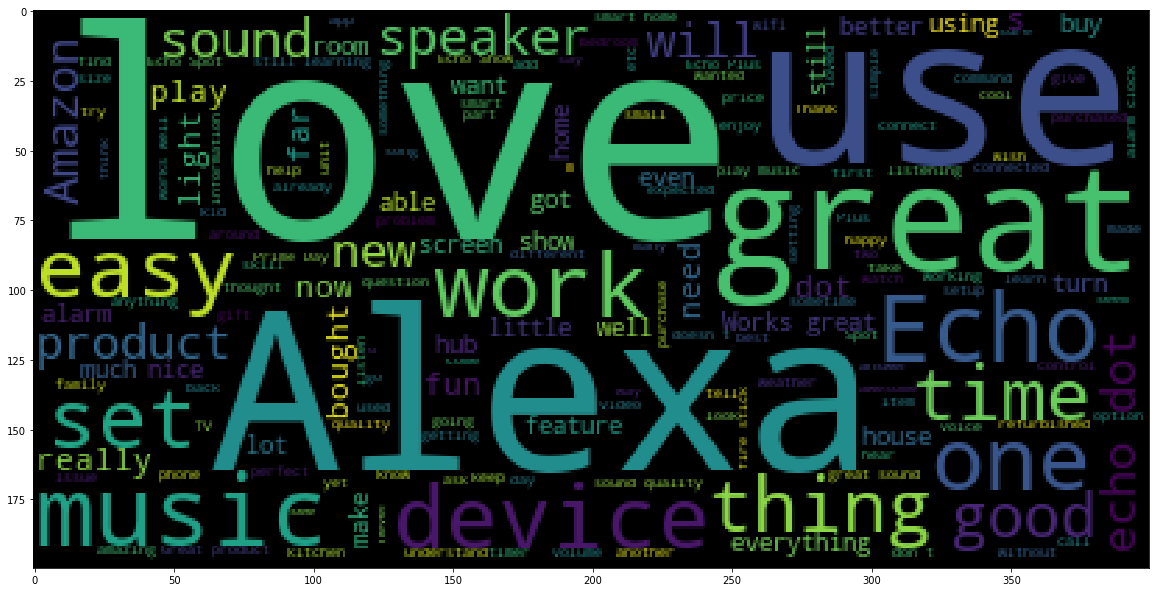

In [36]:
#Plpot Wordcloud
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(sentences_as_one_String))
plt.show()

In [37]:
#Plot wordcloud only for the negatives and then only for the positives


In [38]:
#Negatives
negative_list = negative['verified_reviews'].tolist()

In [39]:
negative_sentences_as_one_string = " ".join(negative_list)

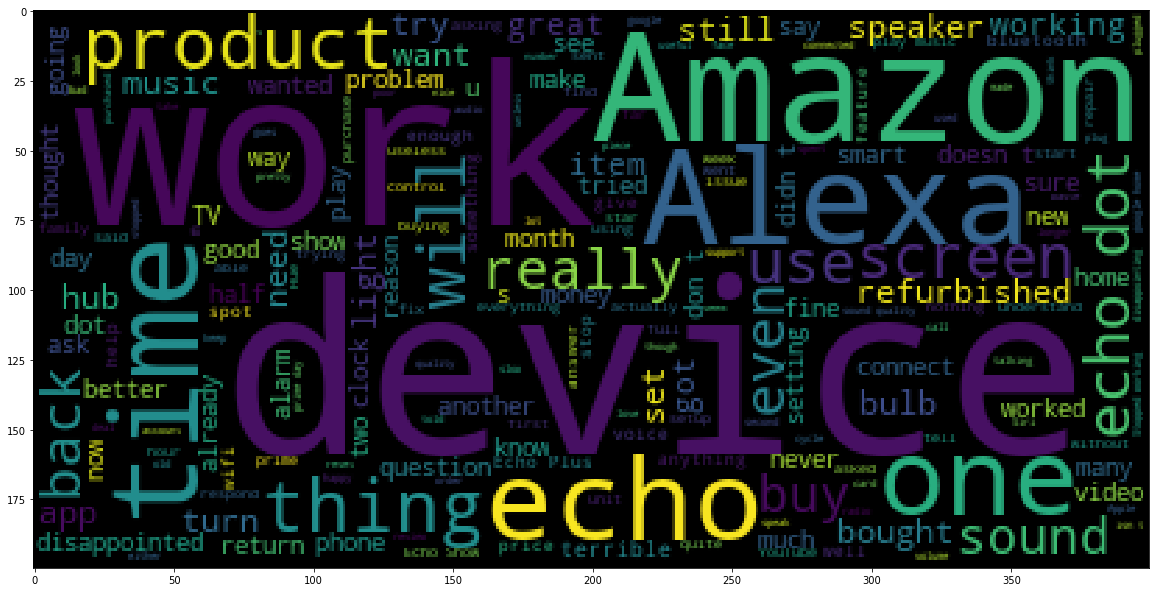

In [40]:
#Plot all the negatives
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))
plt.show()

In [41]:
#improve the wordcloud by improving the common words to derive meaning

In [42]:
#Perform data cleaning

In [43]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [44]:
#Drop date from the date, rating and length feature
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis = 1)

In [45]:
reviews_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [46]:
#Encode the variation column from categorical to numerical numbers
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first = True) #drop first = True to avoid the dummy variable trap.
#Dummy variable trap occurs when there are two columns and one column can be predicted from the other column

In [47]:
variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [48]:
#Go to reviews dataframe and drop the variation column
reviews_df.drop(['variation'], axis = 1, inplace = True)

In [49]:
#now concate reviews_df with variation_dummies
reviews_df = pd.concat([reviews_df, variation_dummies], axis = 1)

In [50]:
reviews_df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [51]:
#feedback is the target output

In [52]:
#Remove Punctuations from texts
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
#Test
test = "Hello Mr. Future, I am so happy to be learning AI now!!"

In [54]:
#Use list comprehension to remove punctuations
Test_punc_removed = [char for char in test if char not in string.punctuation]

In [55]:
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I',
 ' ',
 'n',
 'o',
 'w']

In [56]:
#Now join the characters again into string from list
Test_punc_removed_join = ' '.join(Test_punc_removed)

In [57]:
Test_punc_removed_join

'H e l l o   M r   F u t u r e   I   a m   s o   h a p p y   t o   b e   l e a r n i n g   A I   n o w'

In [58]:
#Remove Stop words (I. may, you, are)
import nltk
nltk.download('stopwords') #download stopwords from NLTK

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tawsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
from nltk.corpus import stopwords # import the stopwords from nltk corpus
stopwords.words('english') #Look for the stop words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [61]:
#Test
Test_punc_removed_join


'H e l l o   M r   F u t u r e   I   a m   s o   h a p p y   t o   b e   l e a r n i n g   A I   n o w'

In [66]:
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split()   if word.lower() not in stopwords.words('english')]

In [67]:
Test_punc_removed_join_clean

['H',
 'e',
 'l',
 'l',
 'r',
 'F',
 'u',
 'u',
 'r',
 'e',
 'h',
 'p',
 'p',
 'b',
 'e',
 'l',
 'e',
 'r',
 'n',
 'n',
 'g',
 'n',
 'w']

In [69]:
#mini challenge
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [72]:
challenge = [ char for char in mini_challenge if char not in string.punctuation] #remove punctuation
challenge = ''.join(challenge) #join the data with a space
challenge = [ word for word in challenge.split() if word.lower() not in stopwords.words('english') ] #remove stop words

In [73]:
challenge

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

In [74]:
#Perform count Vectorization(Tokenization)
#Tokenization is the conversion of texts into 0s and 1s
#Step 1 - create list of columns of every single unique words in the entire string.

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.', 'This document is the second document.', 'And This is the third one.', 'Is this the first document?']

In [85]:
#instantiation an object
vectorizer = CountVectorizer()

In [86]:
X = vectorizer.fit_transform(sample_data)

In [87]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [88]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [89]:
mini_challenge = ['Hello World', 'Hello Hello World.', 'Hello World World World']

In [90]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(mini_challenge)

In [91]:
print(vectorizer.get_feature_names())

['hello', 'world']


In [92]:
print(X.toarray())

[[1 1]
 [2 1]
 [1 3]]


In [95]:
#Create a pipeline to perform data cleaning
#Define a pipeline to clean up all the messages
#The pipeline performs the following (1) Remove punctuation, (2) Remove stopwords

#Create a funtion
def message_cleaning(message):
    Test_punc_removed = [ char for char in message if char not in string.punctuation] #remove punctuation
    Test_punc_removed_join = ''.join(Test_punc_removed) #join the data with a space
    Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english') ] #remove stop words
    return Test_punc_removed_join_clean

In [96]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [97]:
print(reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [98]:
#Original version
print(reviews_df['verified_reviews'][3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [99]:
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
5       [received, echo, gift, needed, another, Blueto...
6       [Without, cellphone, cannot, use, many, featur...
7       [think, 5th, one, Ive, purchased, Im, working,...
8                                          [looks, great]
9       [Love, I’ve, listened, songs, haven’t, heard, ...
10          [sent, 85, year, old, Dad, talks, constantly]
11      [love, Learning, knew, things, eveyday, Still,...
12      [purchased, mother, knee, problems, give, some...
13                                     [Love, Love, Love]
14                                             [expected]
15                                    [love, wife, hates]
16      [Really, happy, purchase, Great, speaker, easy...
17      [using

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

In [102]:
#Create a pipeline directly
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [103]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [104]:
#Tokenized Array
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [105]:
#Create training and Testing data
reviews_countvectorizer.shape

(3150, 5211)

In [106]:
#now drop the original verified column and add the tokenized columns from the original dataframe
reviews_df.drop(['verified_reviews'], axis = 1, inplace = True)

In [107]:
reviews_df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [109]:
#take the encoded reviews and convert that into a dataFrame
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [110]:
reviews

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
#Concatenation
reviews_df = pd.concat([reviews_df, reviews], axis = 1)

In [112]:
reviews_df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
#Create X and y

X = reviews_df.drop(['feedback'], axis = 1) #input

In [115]:
y = reviews_df['feedback'] #output

### Model Development: Naive Bayes Classifier


In [117]:
X.shape

(3150, 5226)

In [118]:
y.shape

(3150,)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [126]:
#Instantiate a classifier
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [128]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
#Check the model prediction using the training data first, then testing data
y_predict_train = NB_classifier.predict(X_train)

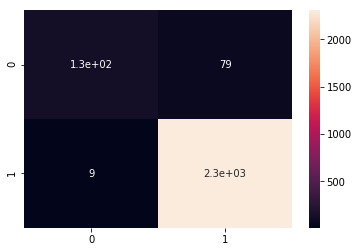

In [132]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)
plt.show()

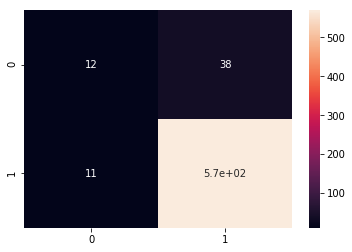

In [134]:
#Confusion matrix for the testing data
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)
plt.show()

In [135]:
#Classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.52      0.24      0.33        50
           1       0.94      0.98      0.96       580

    accuracy                           0.92       630
   macro avg       0.73      0.61      0.64       630
weighted avg       0.90      0.92      0.91       630



### Model Development: Logistic Regression


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [138]:
#Instantiate Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [139]:
y_pred = model.predict(X_test) #Model predictions

In [140]:
#Plot the overall accuracy of the model
print('Accuracy = {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy = 93.4920634920635 %


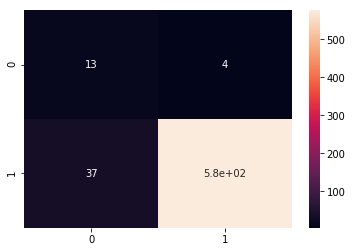

In [142]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)
plt.show()

In [143]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.26      0.39        50
           1       0.94      0.99      0.97       580

    accuracy                           0.93       630
   macro avg       0.85      0.63      0.68       630
weighted avg       0.93      0.93      0.92       630



### Conclusion

The best model is Logistic Regression with 93% Accuracy. Both model needs improvement as precision and recall scores are low